# EDA 

In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# from sklearn.feature_selection import VarianceThreshold
import datetime

from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
# from sklearn.svm import SVR

from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from math import sqrt

# from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
# from sklearn.svm import SVR
# from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

In [131]:
# load the data to dataframes
train_df = pd.read_csv("https://s3.amazonaws.com/it4ba/Kaggle/train.csv")
test_df = pd.read_csv("https://s3.amazonaws.com/it4ba/Kaggle/test.csv")

# Combine it into one large file for data exploration and cleaning
joint_df = pd.concat([train_df, test_df])

# Get a first view
print(joint_df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

Lets Look at the Information of the Training, Test, and newly Combined datframes

Because Train, Test, and Combined all deal with the same data columns, I will only need to take the info function from one frame. Will use joint because it encapsulates that most data 


In [132]:
#Shape
print("The train data has Rows {}, Columns {}".format(train_df.shape[0], train_df.shape[1]))
print("The test data has Rows {}, Columns {}".format(test_df.shape[0], test_df.shape[1]))
print("The test data has Rows {}, Columns {}".format(joint_df.shape[0], joint_df.shape[1]))

# Head()
newline = "    "
print(train_df.head())
print(newline)
print(test_df.head())
print(newline)
print(joint_df.head())
print(newline)
print(newline)

# Info
# This also gives a a quick look at potential missing values
print(joint_df.info())

The train data has Rows 1460, Columns 81
The test data has Rows 1459, Columns 80
The test data has Rows 2919, Columns 81
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ... 

## Understanding the Variables


The Main Player: The. variable that we need to learn about is sales price. I will use the Train_df, because for the test_df sales prices is null and the if I used joint it would skew my data, as about half would be null. 


In [133]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


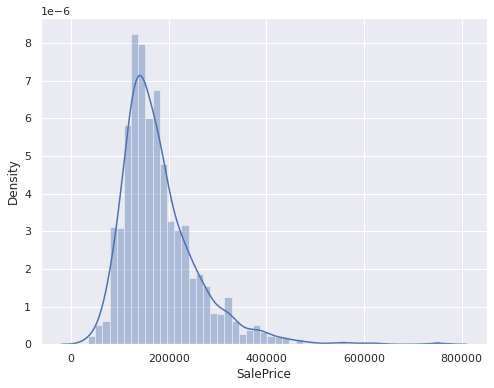

In [134]:
plt.figure(figsize=(8,6))
sns.distplot(train_df['SalePrice'])
#Notice how the data in skewed to the right meaning that the sample is not of normal distribution, this can and will be addressed later.


# Data Cleaning


In [135]:
print(joint_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

Looking at the Data, we could quickly identify two type of data 


1.   Categorical
2.   Quantitative

Objects tend to fall under Caterogical Data while, int64 and float64 tend to fall under Quantitative data. However looking at the data there are two notable exceptions. 

That being that MSSubclass, MoSold the next code cell converts the type from int to object. 

MSSubclass is considered Caterogical  Data because xyz
MoSold is also considered  Qualitative Data because xyz

I will handle the the Caterogical , and Quantitative part after 







## Cleaning Categorical Data



In [136]:
# Classify int variables into category if needed
joint_df["MSSubClass"] = joint_df["MSSubClass"].astype("object")
joint_df["MoSold"] = joint_df["MoSold"].astype("object")

# From the list above, features like MiscFeature, FireplaceQu, Fence, PoolQC, and Alley have alot of amount of null values. But in order to determine wether or not 
# Alley: Type of alley access to property
# PoolQC: Pool quality
# Fence: Fence quality
# MiscFeature: Miscellaneous feature not covered in other categories
# FireplaceQu: Fireplace quality
# We can see that not only they have so many null, but also they don't look important for our analysis. So I assume it is safe if we want to drop them. For now I am not going to drop them yet.

joint_to_drop = joint_df[['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu']]
joint_to_drop 


Alley PoolQC  Fence MiscFeature FireplaceQu
0      NaN    NaN    NaN         NaN         NaN
1      NaN    NaN    NaN         NaN          TA
2      NaN    NaN    NaN         NaN          TA
3      NaN    NaN    NaN         NaN          Gd
4      NaN    NaN    NaN         NaN          TA
...    ...    ...    ...         ...         ...
1454   NaN    NaN    NaN         NaN         NaN
1455   NaN    NaN    NaN         NaN         NaN
1456   NaN    NaN    NaN         NaN          TA
1457   NaN    NaN  MnPrv        Shed         NaN
1458   NaN    NaN    NaN         NaN          TA

[2919 rows x 5 columns]


This code is attempting to fill in the missing values in the missing_vals list with the mode from the rows that have matching values in the "Functional" and "OverallQual" columns. If that fails, it fills the missing values with the mode of the data grouped by the "MSSubClass" and "Neighborhood" columns and then If that also fails, it fills the missing values with the mode of the entire column.

The logic behind having the neighborhood and MSSubClass as back up is that same areas and similar subclassFor a majority of the Data, we are going to assume that due to houses in the same neighborhood and MSSubClass are bound to have similar features when it comes, to Quality, Condition, Ulititilies, Electericity etc... and therefore we will replace the empty values with the Mode.

House features can be broken down further but this will do for now




In [137]:
# Categorical data impute with mode of neighborhood and MSSubClass or just mode of own column if missing
missing_vals_house_features = ['BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'KitchenQual', 'Functional','GarageType', 'GarageFinish','GarageQual','GarageCond','Exterior1st', 'Exterior2nd','FireplaceQu', "PoolQC", "Fence", "MiscFeature"]
missing_vals_area_location = ["MSZoning", "Alley"] 
missing_vals_ue = ["Utilities","Electrical"]
missing_vals_basics = ["Utilities","MasVnrType", "Electrical"]
missing_val_sale_type = ["SaleType"]

  
for missing_val in missing_vals_house_features:
    try:
        joint_df[missing_val] = joint_df.groupby(['Functional','OverallQual'])[missing_val].transform(lambda x: x.fillna(x.mode()[0]))
    except: 
        try:
            joint_df[missing_val] = joint_df.groupby(['MSSubClass', "Neighborhood"])[missing_val].transform(lambda x: x.fillna(x.mode()[0]))
        except:
            joint_df[missing_val].fillna((joint_df[missing_val].mode()[0]), inplace=True)

for missing_val in missing_vals_area_location:
    try:
        joint_df[missing_val] = joint_df.groupby(['MSSubClass', "Neighborhood", "MSZoning", "Street" ])[missing_val].transform(lambda x: x.fillna(x.mode()[0]))
    except: 
          try:
            joint_df[missing_val] = joint_df.groupby(['MSSubClass', "Neighborhood", "Alley", "Street" ])[missing_val].transform(lambda x: x.fillna(x.mode()[0]))
          except: 
                try:
                  joint_df[missing_val] = joint_df.groupby(['MSSubClass', "Neighborhood", "MSSubClass"])[missing_val].transform(lambda x: x.fillna(x.mode()[0]))
                except:
                  try:
                    joint_df[missing_val] = joint_df.groupby(['MSSubClass', "Neighborhood"])[missing_val].transform(lambda x: x.fillna(x.mode()[0])) 
                  except:
                    joint_df[missing_val].fillna((joint_df[missing_val].mode()[0]), inplace=True)


for missing_val in missing_vals_ue: 
    try:
        joint_df[missing_val] = joint_df.groupby(['Heating', "HeatingQC", "CentralAir", "Utilities"])[missing_val].transform(lambda x: x.fillna(x.mode()[0]))
    except: 
          try:
            joint_df[missing_val] = joint_df.groupby(['Heating', "HeatingQC", "CentralAir","Electrical"])
          except:
             try: 
              joint_df[missing_val] = joint_df.groupby(['Heating', "CentralAir","Electrical"])
             except: 
              try:  
                joint_df[missing_val] = joint_df.groupby(['HeatingQC', "CentralAir","Electrical"])
              except:
                try:
                  joint_df[missing_val] = joint_df.groupby(['Heating', "CentralAir", "Utilities"])
                except: 
                  try:
                    joint_df[missing_val] = joint_df.groupby(['HeatingQC', "CentralAir", "Utilities"])
                  except: 
                    try: 
                      joint_df[missing_val] = joint_df.groupby(['Heating','HeatingQC', "CentralAir"])[missing_val].transform(lambda x: x.fillna(x.mode()[0])) 
                    except:
                     try:
                       joint_df[missing_val] = joint_df.groupby(['MSSubClass', "Neighborhood"])[missing_val].transform(lambda x: x.fillna(x.mode()[0])) 
                     except:
                       joint_df[missing_val].fillna((joint_df[missing_val].mode()[0]), inplace=True)

for missing_val in missing_vals_basics:
    try:
        joint_df[missing_val] = joint_df.groupby(['Heating', "HeatingQC", "CentralAir", "Utilities", "Electrical"])[missing_val].transform(lambda x: x.fillna(x.mode()[0]))
    except: 
          try:
            joint_df[missing_val] = joint_df.groupby(['Heating', "HeatingQC", "CentralAir", "Utilities", "MasVnrType"])[missing_val].transform(lambda x: x.fillna(x.mode()[0]))
          except: 
                try:
                   joint_df[missing_val] = joint_df.groupby(['Heating', "HeatingQC", "CentralAir", "Electrical", "MasVnrType"])[missing_val].transform(lambda x: x.fillna(x.mode()[0]))
                except:
                  try:
                    joint_df[missing_val] = joint_df.groupby(['MSSubClass', "Neighborhood"])[missing_val].transform(lambda x: x.fillna(x.mode()[0])) 
                  except:
                    joint_df[missing_val].fillna((joint_df[missing_val].mode()[0]), inplace=True)


for missing_val in missing_val_sale_type:
   try:
        joint_df[missing_val] = joint_df.groupby(['MSSubClass', "Neighborhood"])[missing_val].transform(lambda x: x.fillna(x.mode()[0]))
   except:
        try:
            joint_df[missing_val] = joint_df.groupby(['MSSubClass', "Neighborhood"])[missing_val].transform(lambda x: x.fillna(x.mode()[0]))
        except: 
            joint_df[missing_val].fillna((joint_df[missing_val].mode()[0]), inplace=True)
          
joint_df

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1         60       RL         65.0     8450   Pave  Grvl      Reg   
1        2         20       RL         80.0     9600   Pave  Grvl      Reg   
2        3         60       RL         68.0    11250   Pave  Grvl      IR1   
3        4         70       RL         60.0     9550   Pave  Grvl      IR1   
4        5         60       RL         84.0    14260   Pave  Grvl      IR1   
...    ...        ...      ...          ...      ...    ...   ...      ...   
1454  2915        160       RM         21.0     1936   Pave  Grvl      Reg   
1455  2916        160       RM         21.0     1894   Pave  Grvl      Reg   
1456  2917         20       RL        160.0    20000   Pave  Grvl      Reg   
1457  2918         85       RL         62.0    10441   Pave  Grvl      Reg   
1458  2919         60       RL         74.0     9627   Pave  Grvl      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0     Ex  MnPrv        Shed       0   
1            Lvl    AllPub  ...        0     Ex  MnPrv        Shed       0   
2            Lvl    AllPub  ...        0     Ex  MnPrv        Shed       0   
3            Lvl    AllPub  ...        0     Ex  MnPrv        Shed       0   
4            Lvl    AllPub  ...        0     Ex  MnPrv        Shed       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1454         Lvl    AllPub  ...        0     Ex  MnPrv        Shed       0   
1455         Lvl    AllPub  ...        0     Ex  MnPrv        Shed       0   
1456         Lvl    AllPub  ...        0     Ex  MnPrv        Shed       0   
1457         Lvl    AllPub  ...        0     Ex  MnPrv        Shed     700   
1458         Lvl    AllPub  ...        0     Ex  MnPrv        Shed       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal   208500.0  
1         5   2007        WD         Normal   181500.0  
2         9   2008        WD         Normal   223500.0  
3         2   2006        WD        Abnorml   140000.0  
4        12   2008        WD         Normal   250000.0  
...     ...    ...       ...            ...        ...  
1454      6   2006        WD         Normal        NaN  
1455      4   2006        WD        Abnorml        NaN  
1456      9   2006        WD        Abnorml        NaN  
1457      7   2006        WD         Normal        NaN  
1458     11   2006        WD         Normal        NaN  

[2919 rows x 81 columns]

## Cleaning Numerical Data 

In [138]:
# Continuous data
missing_vals = ["LotFrontage", 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF1','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea',]
impute_vals = ["LotConfig" ,"Neighborhood",'BsmtFinType1', 'BsmtFinType2','BsmtQual', 'BsmtQual', 'BsmtQual','GarageType', 'GarageType']

for missing_val, impute_val in zip(missing_vals, impute_vals):
    joint_df[missing_val] = joint_df[missing_val].fillna(joint_df.groupby(impute_val)[missing_val].transform('mean'))

# Continuous impute data based on other continuous data
missing_vals = ['GarageYrBlt']
impute_vals = ['YearBuilt']

for missing_val, impute_val in zip(missing_vals, impute_vals):
    joint_df[missing_val] = joint_df[missing_val].fillna(joint_df[impute_val])

# Fill all leftovers with mean
for missing_val in joint_df.columns.values.tolist():

    if missing_val == "SalePrice":
        pass

    else:
        try:
            joint_df[missing_val] = joint_df[missing_val].fillna(joint_df[missing_val].mean())
        except:
            pass


# List of cols with missing values
print([col for col in joint_df.columns if joint_df[col].isnull().any()])

['SalePrice']


# Data Cleaning Round 2

Removal of Outlier from the Data set based on the OverallQual, TotalArea, SalePrice graph

In [ ]:
T = quant_feat['TotalArea']
S = quant_feat['SalePrice']

# Calculate the mean and standard deviation of the TotalArea and SalePrice
mean_T = sum(T)/len(T)
std_T = (sum((T - mean_T)**2)/len(T))**0.5

mean_S = sum(S)/len(S)
std_S = (sum((S - mean_S)**2)/len(S))**0.5


# Calculate the z-score of each observation
z_score_T = (T - mean_T)/std_T
z_score_S = (S - mean_S)/std_S


# Create a new DataFrame with the z-scores
z_scores = pd.DataFrame({'TotalArea':z_score_T,'SalePrice':z_score_S})


# Remove outliers
outliers = z_scores[(z_scores['TotalArea'] > 3) | (z_scores['SalePrice'] > 3)].index
quant_feat_clean = quant_feat.drop(outliers)

quant_feat_clean


SalePrice  TotalArea  OverallQual  GrLivArea  GarageCars  TotalBsmtSF  \
0      208500.0     4824.0            7       1710         2.0        856.0   
1      181500.0     4246.0            6       1262         2.0       1262.0   
2      223500.0     5100.0            7       1786         2.0        920.0   
3      140000.0     4832.0            7       1717         3.0        756.0   
4      250000.0     6377.0            8       2198         3.0       1145.0   
...         ...        ...          ...        ...         ...          ...   
1455   175000.0     4707.0            6       1647         2.0        953.0   
1456   210000.0     6188.0            6       2073         2.0       1542.0   
1457   266500.0     6084.0            7       2340         1.0       1152.0   
1458   142125.0     3474.0            5       1078         1.0       1078.0   
1459   147500.0     4044.0            5       1256         1.0       1256.0   

      Bathrooms  YearBuilt  YearRemodAdd  
0           2.5       2003          2003  
1           2.0       1976          1976  
2           2.5       2001          2002  
3           1.0       1915          1970  
4           2.5       2000          2000  
...         ...        ...           ...  
1455        2.5       1999          2000  
1456        2.0       1978          1988  
1457        2.0       1941          2006  
1458        1.0       1950          1996  
1459        1.5       1965          1965  

[1434 rows x 9 columns]

# Feature Engineering

In [139]:
# Add and change some variables, namely the "Year" ones as it would be better to have them as "Age"
year = datetime.date.today().year
joint_df["AgeSold"] = int(year) - joint_df["YrSold"].astype(int)
joint_df["AgeGarage"] = int(year) - joint_df["GarageYrBlt"].astype(int)


In [140]:
# Add some features related to total area of the house
joint_df['TotalArea'] = joint_df['TotalBsmtSF'] + joint_df['1stFlrSF'] + joint_df['2ndFlrSF'] + joint_df['GrLivArea'] +joint_df['GarageArea']
joint_df['Bathrooms'] = joint_df['FullBath'] + joint_df['HalfBath']/2
joint_df['Year average']= (joint_df['YearRemodAdd']+joint_df['YearBuilt'])/2



# Plotting and Creating Corralation Charts

## Creating Regression Tables 


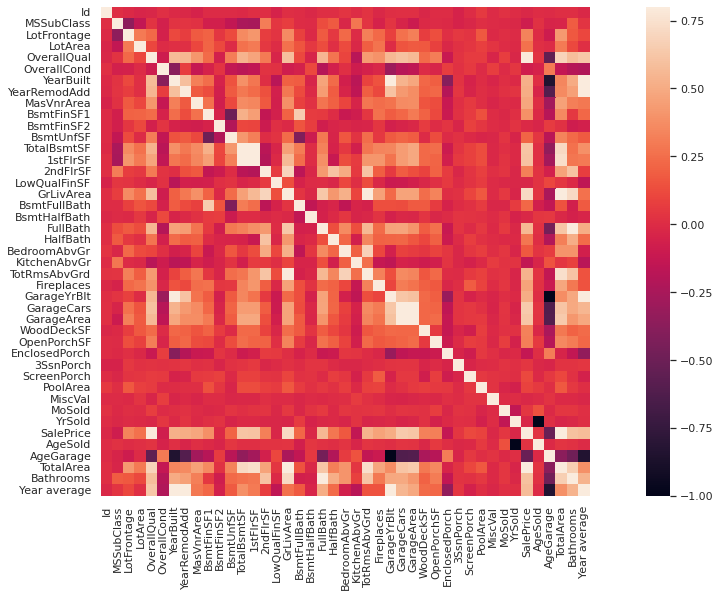

In [141]:
train_df = joint_df[joint_df["SalePrice"] > 0 ]
quant_feat = train_df.select_dtypes(include = ['float64', 'int64'])
quant_feat.head()                             

# Create the X and y sets
X_train_df = train_df.drop(["SalePrice"], axis = 1)
y_train_df = train_df[["Id" ,"SalePrice"]]

#correlation matrix
num_corr = quant_feat.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(num_corr, vmax=.8, square=True);

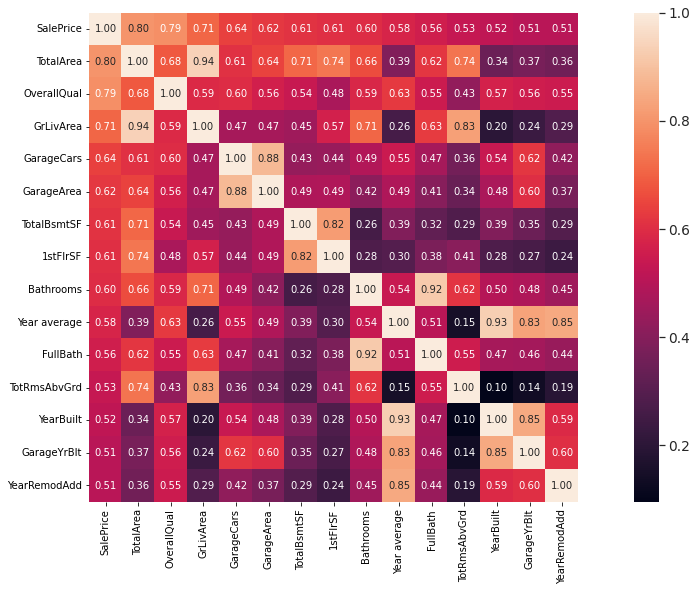

In [ ]:
k = 15 #number of variables for heatmap
cols = num_corr.nlargest(k, 'SalePrice')['SalePrice'].index   # nlargest : pick the most powerfull correlation
cm = np.corrcoef(train_df[cols].values.T)
f, ax = plt.subplots(figsize=(20, 9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


In [ ]:
#Display anything with a correlation greater that .5
num_corrlist = quant_feat.corr()['SalePrice'][:-1]
num_list = num_corrlist[abs(num_corrlist) > 0.5].sort_values(ascending=False)
num_list


SalePrice       1.000000
TotalArea       0.801018
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
Bathrooms       0.597966
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
GarageYrBlt     0.508043
YearRemodAdd    0.507101
AgeGarage      -0.508043
Name: SalePrice, dtype: float64

Above displays the the correlation of any variables which respect to Sales price that have an absolute value greater that .5. 

But the question is what do these mean, how would these varaible impact the sales price. 

Well, here they are

*   TotalArea: Square Footage of House
*   OverallQual: Overall Quality
*   GrLivArea: Above grade (ground) living area square feet
*   GarageCars: Size of garage in car capacity
*   GarageArea: Size of garage in square feet
*   TotalBsmtSF: Total square feet of basement area
*   1stFlrSF: First Floor square feet
*   Bathrooms: Total Bathrooms 
*   FullBath: Full bathrooms above grade
*   TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
*  YearBuilt: Original construction date
*  YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
*   AgeGarage:  Years from Construction of Garage from current year
*   AgeBuilt: Years from Construction from current year


GragageCars and GarageArea not only they have the same meaning, but they also have similar correlation number (almost). Hence, we can choose one and it will be GarageCars due to its higher correlation number.

TotalArea, TotalBsmtSF, and 1stFlrSF both have a high correlation to each other. We can keep the former because of the higher correlation to the sales price.

Additionally Bathrooms and FullBath both have a high correlation to each other. We can keep the former because of the higher correlation to the sales price.

YearBuilt and AgeBuilt are the Same except asking the inverse question in reverse and asks a similar question age with a worse correlation so AgeGarage is a worse interms of corelation so that can be remove in-addition to AgeBuilt because I would prefer to work with positive correlation for consisistancy

GrLivArea and TotRmsAbvGrd have the same case as well, so TotRmsAbvGrd can be ignored.

The rest can be kept





In [ ]:
print(length([elem["OveralQual"] == 10 for elem in tra]))



## Plotting Correlation on Graph

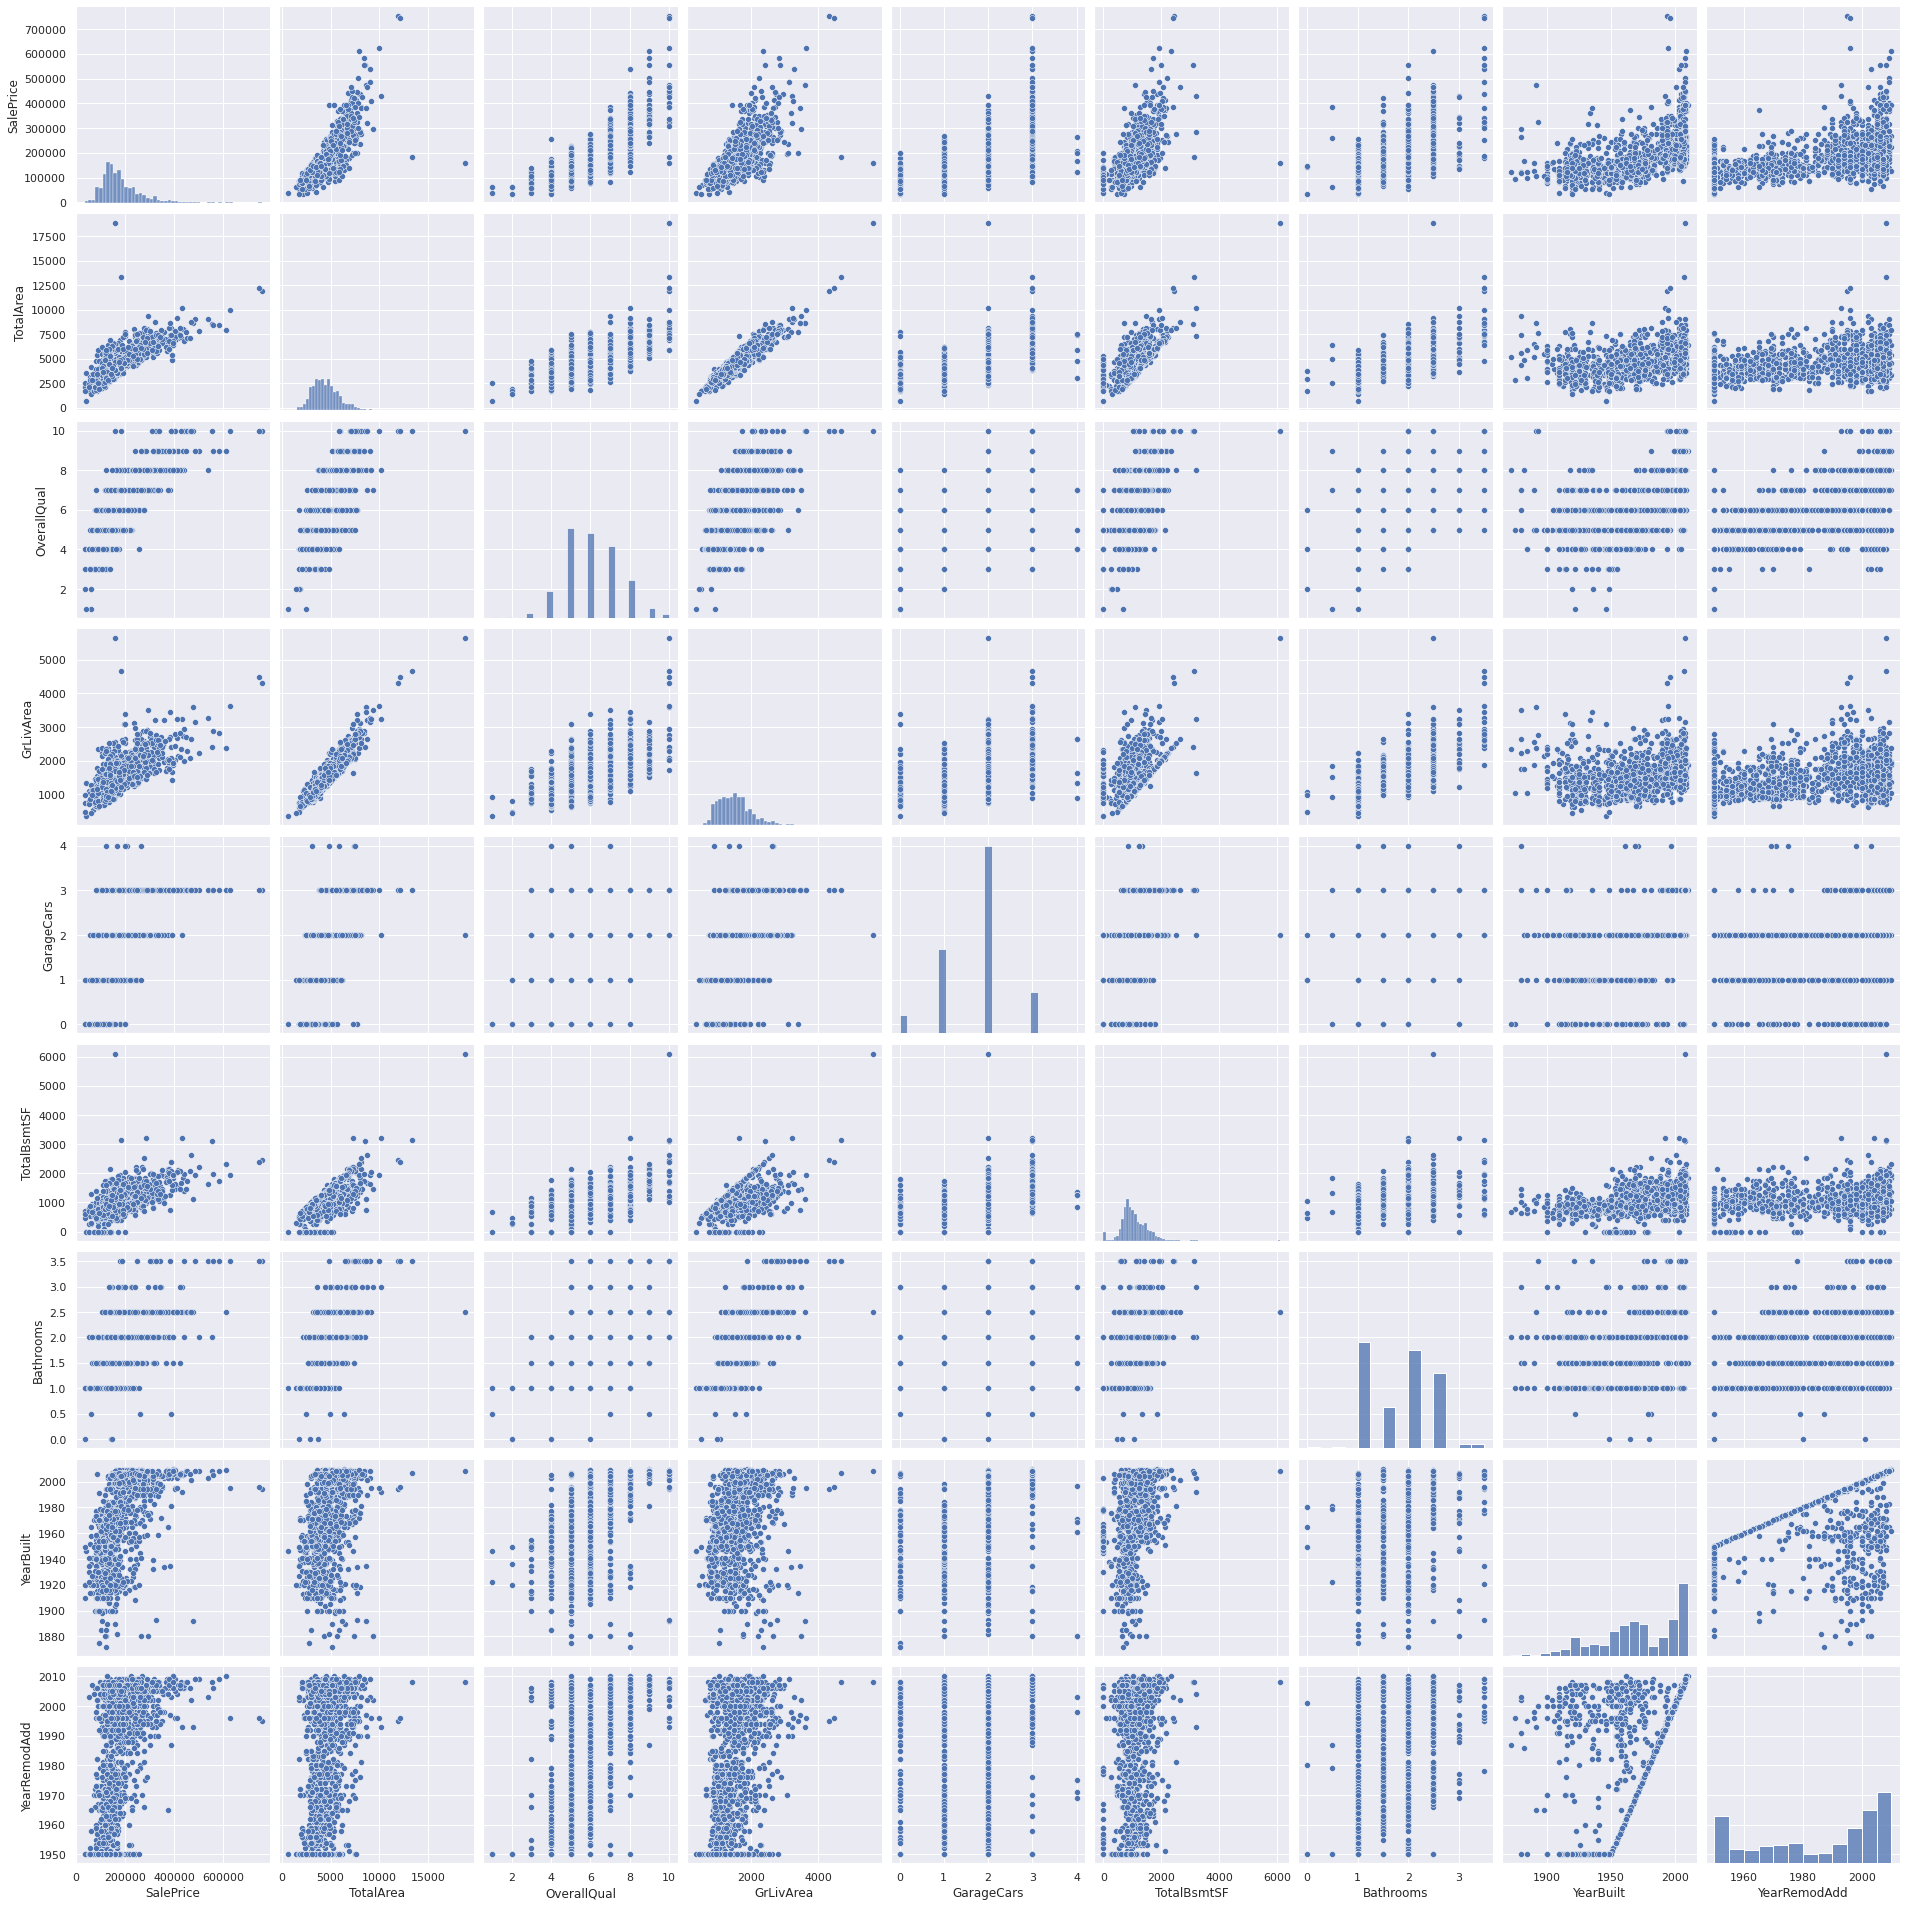

In [ ]:
cols = ['SalePrice', 'TotalArea', 'OverallQual', 'GrLivArea','GarageCars', 'TotalBsmtSF', 'Bathrooms', 'YearBuilt', 'YearRemodAdd']
quant_feat = quant_feat[cols]

sns.set()
sns.pairplot(quant_feat, height = 3)
plt.show();

I'm going to highlight the few that I found the most interesting. 



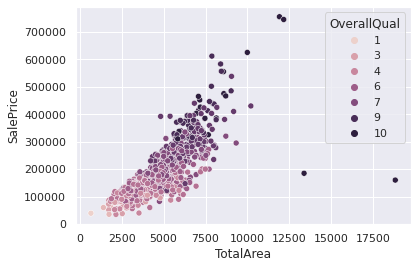

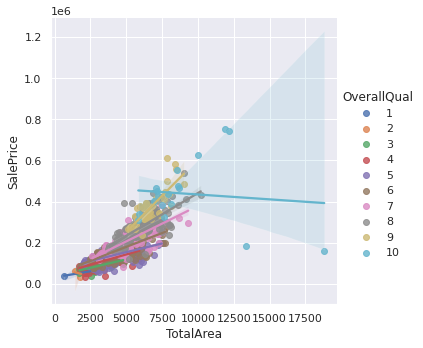

In [ ]:
# OverallQual, TotalArea, SalePrice
sns.scatterplot(data=quant_feat, x='TotalArea', y='SalePrice', hue = 'OverallQual')
sns.lmplot(data=quant_feat, x='TotalArea', y='SalePrice',hue = 'OverallQual')

The above graph show use something fascinating, So we can see that the bigger area above ground and the better overall quality of the house, the higher sales price will be. 

However this principle does not apply for 10, and I beleieve its being caused by the two outliers. I will remove them to see how it impact the graph. 



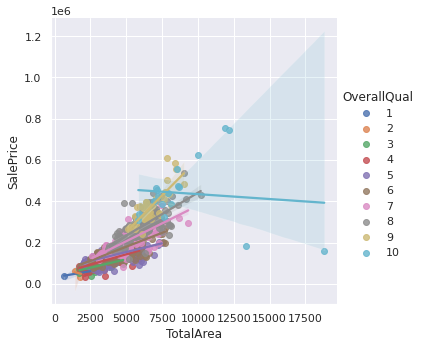

In [ ]:
sns.lmplot(data=quant_feat, x='TotalArea', y='SalePrice',hue = 'OverallQual')

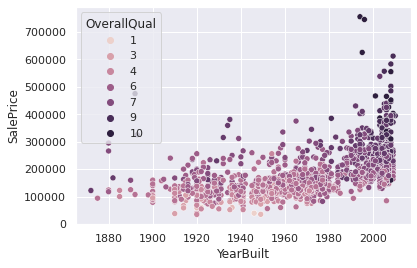

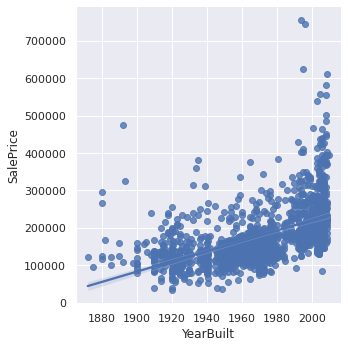

In [ ]:
# YearBuilt, OverallQual, SalePrice
sns.scatterplot(data=quant_feat, x='YearBuilt', y='SalePrice', hue = 'OverallQual');
sns.lmplot(data=quant_feat, x='YearBuilt', y='SalePrice')


Newer houses tend to have a better quality and more expensive price

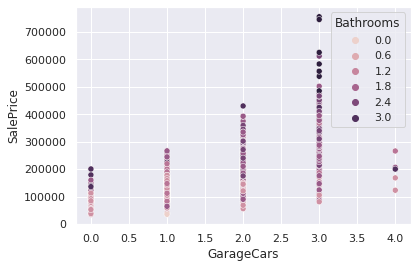

In [ ]:
# GarageCars, Bathrooms, SalePrice
sns.scatterplot(data=quant_feat, x='GarageCars', y='SalePrice', hue = 'Bathrooms');


For the same size of cars garage, the more full bathrooms it has, the sales price will increase as expected.

## Categorical Plots


In [ ]:
category_feat = train_df.select_dtypes(['object'])
category_feat.head()   

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave  Grvl      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave  Grvl      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave  Grvl      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave  Grvl      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave  Grvl      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
0          Y     Ex  MnPrv        Shed       WD        Normal  
1          Y     Ex  MnPrv        Shed       WD        Normal  
2          Y     Ex  MnPrv        Shed       WD        Normal  
3          Y     Ex  MnPrv        Shed       WD       Abnorml  
4          Y     Ex  MnPrv        Shed       WD        Normal  

[5 rows x 43 columns]

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 41.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 30.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 34.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.8% of the points cannot be placed; y

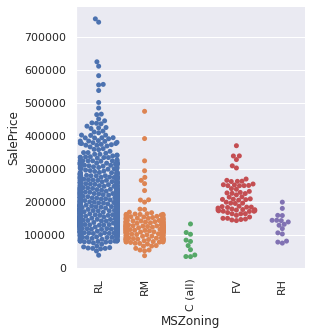

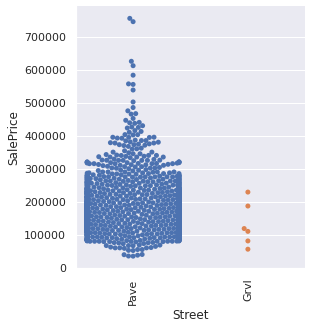

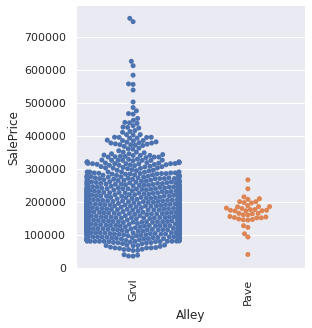

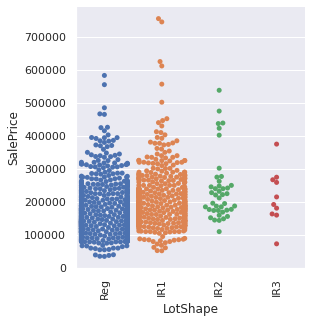

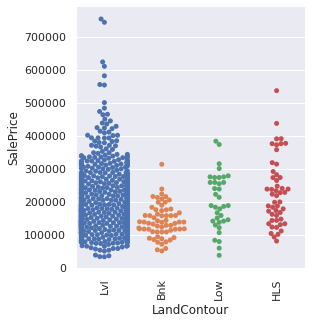

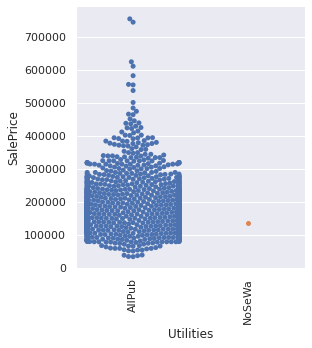

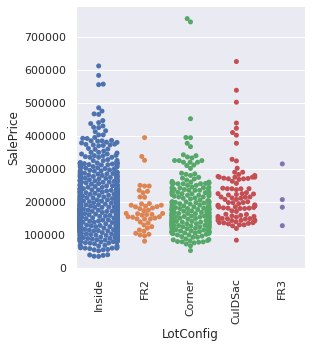

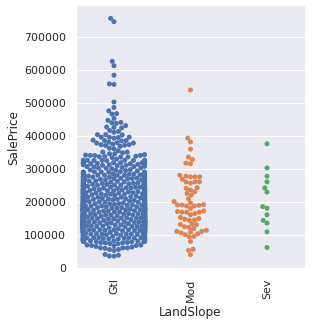

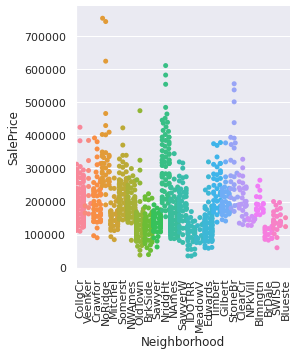

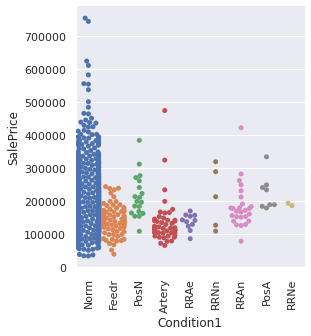

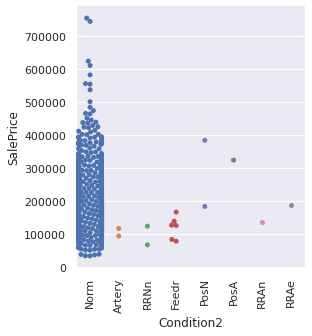

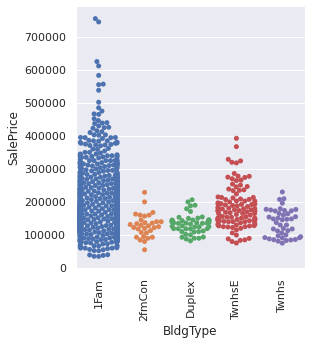

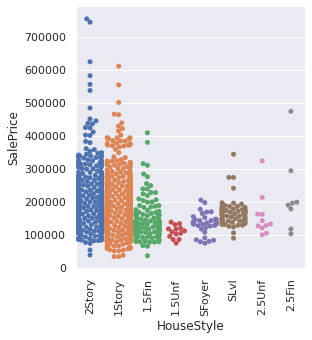

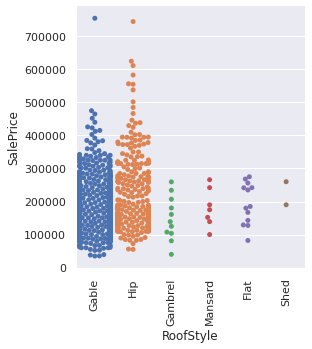

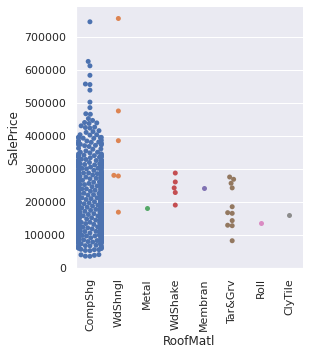

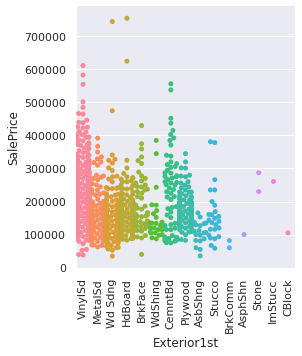

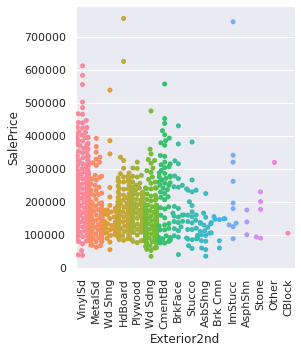

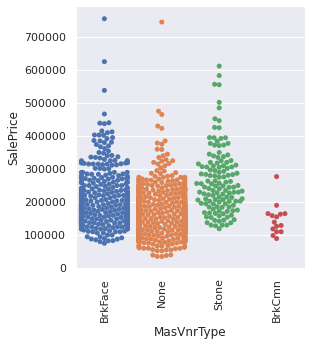

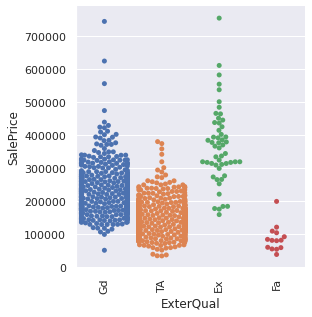

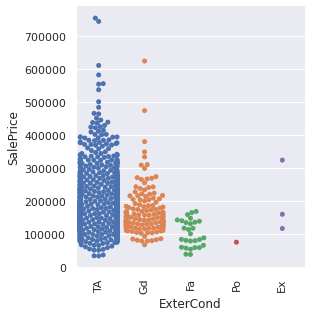

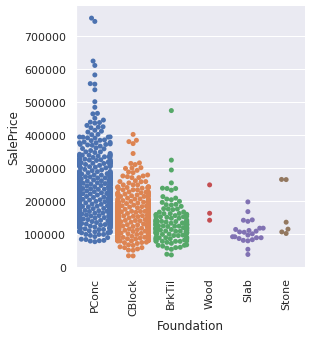

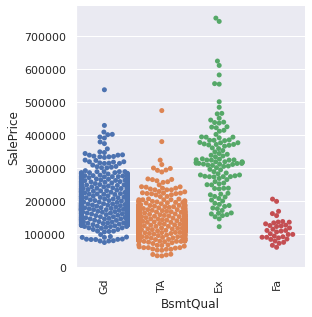

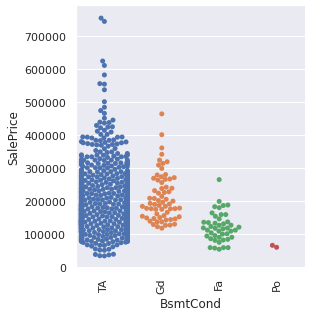

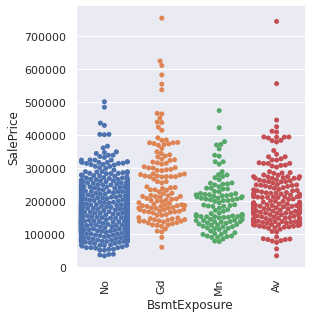

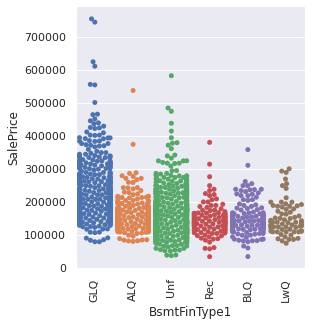

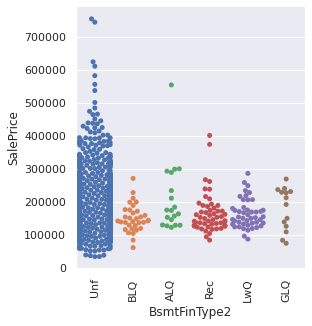

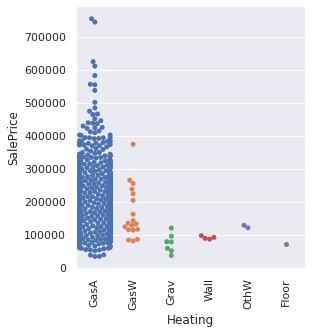

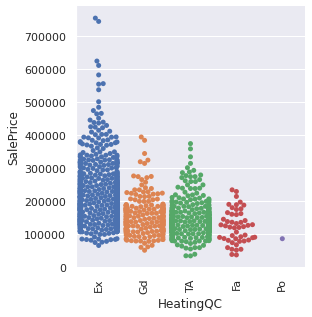

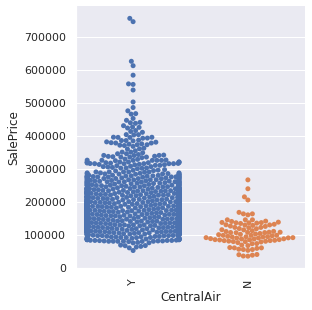

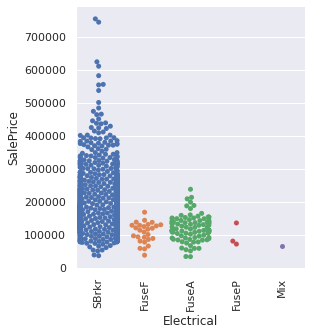

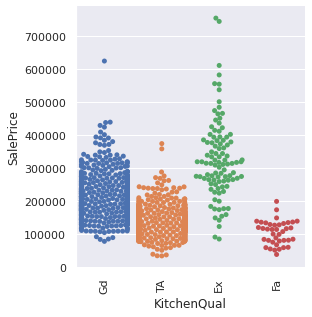

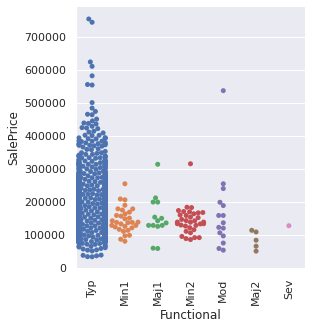

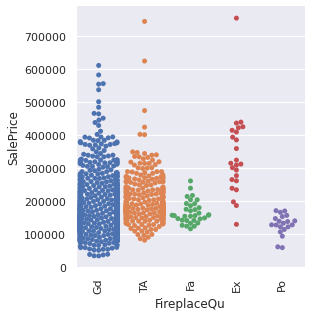

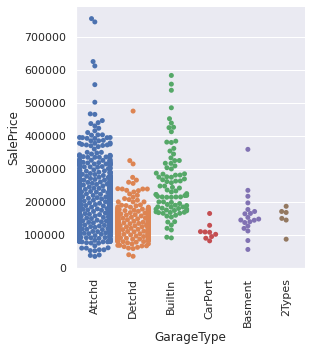

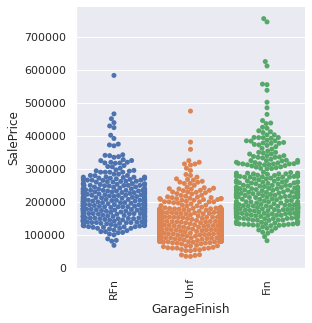

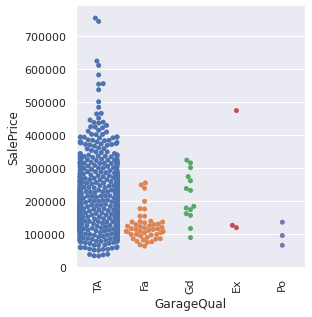

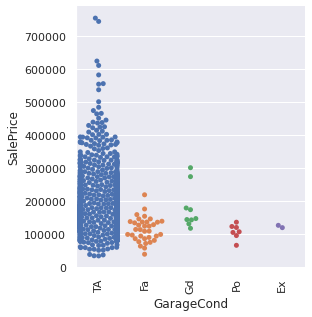

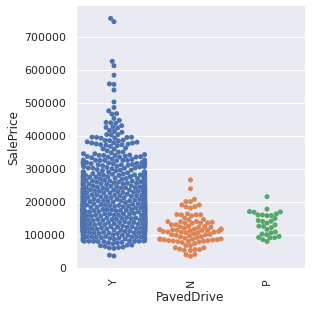

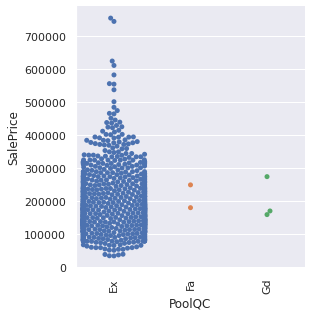

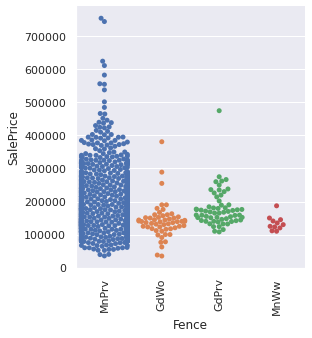

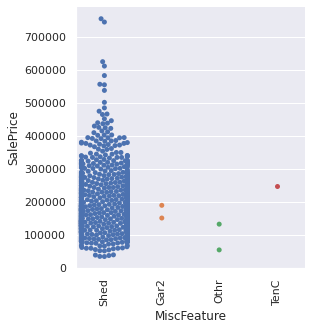

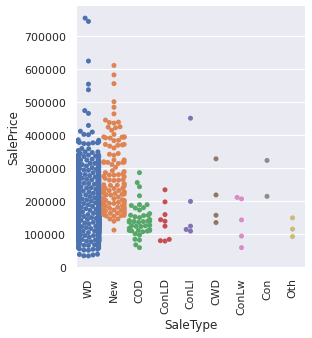

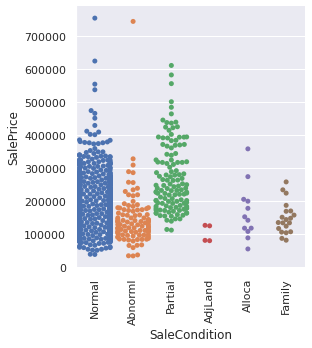

In [ ]:
for element in category_feat:
    cat_plot = sns.catplot(y="SalePrice", x= element, kind="swarm", legend="full", data=joint_df, height=4.5, aspect=3 / 3,);
    cat_plot.set_xticklabels(rotation=90)

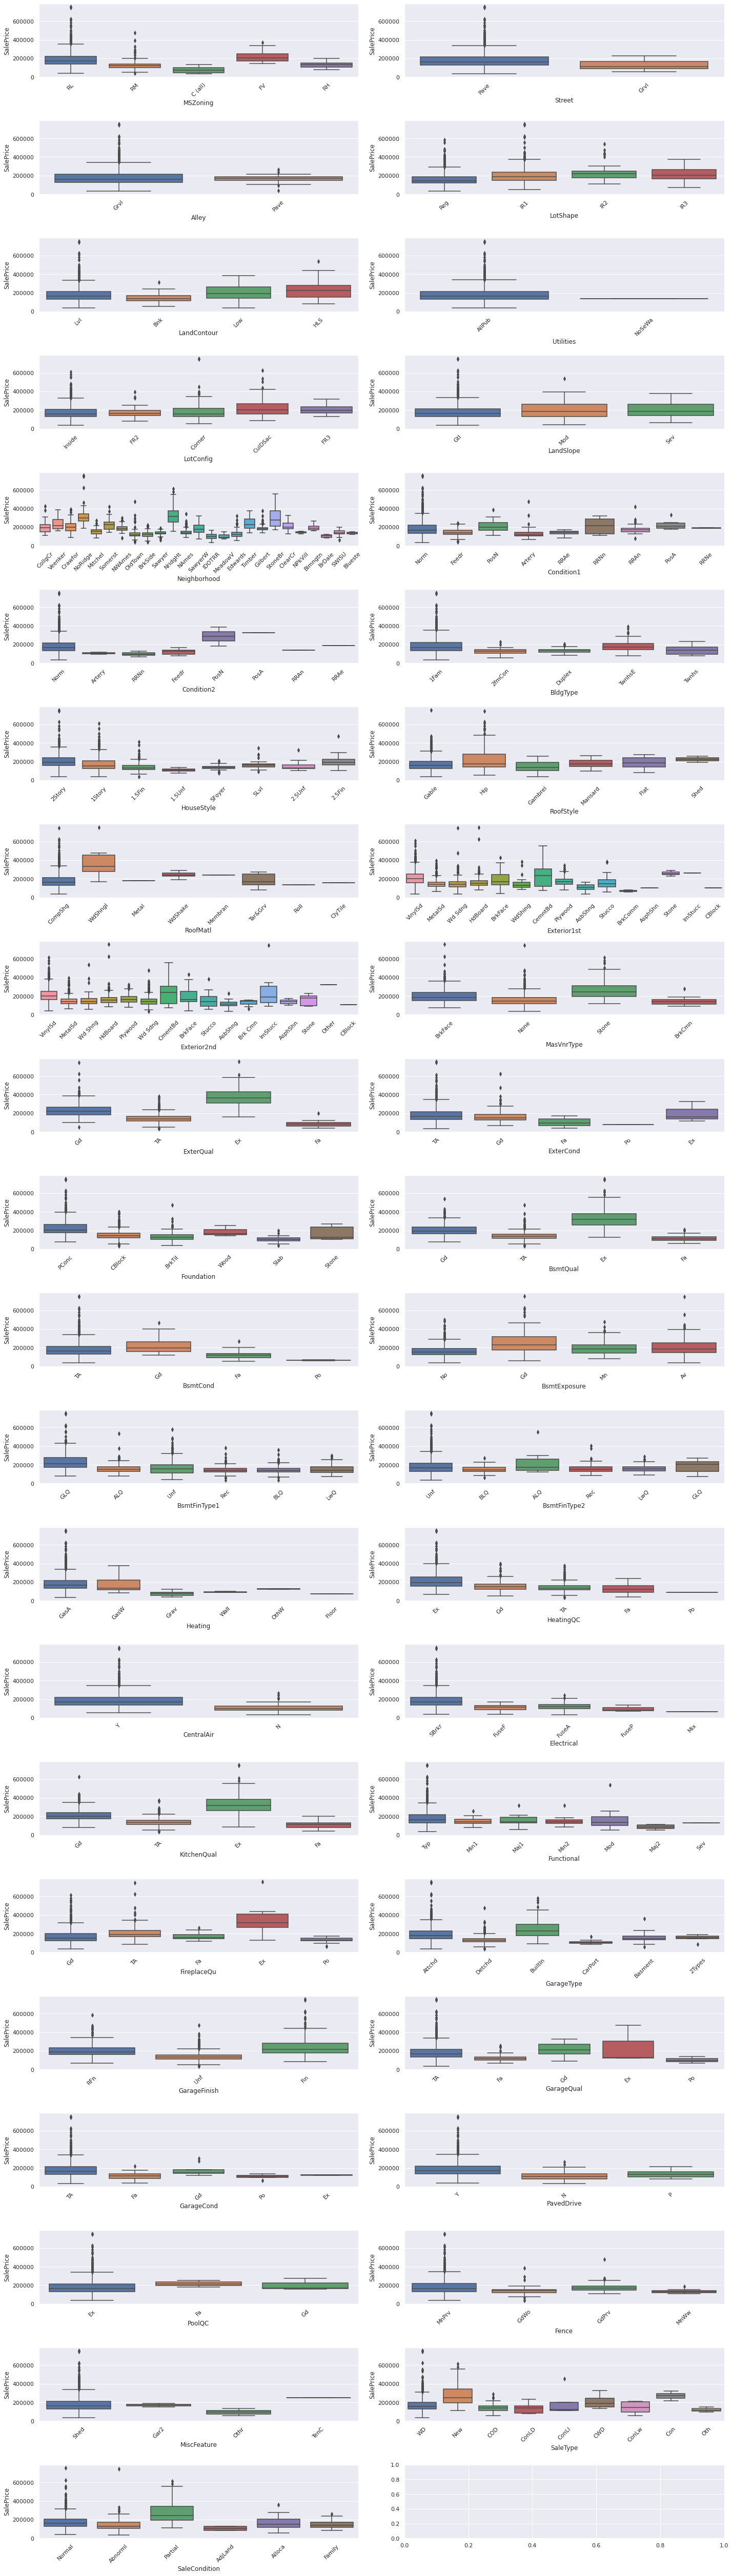

In [ ]:
category_feat_price = pd.concat([category_feat, quant_feat['SalePrice']], axis=1)

fig, axes = plt.subplots(22, 2, figsize=(20, 70))

for i, ax in enumerate(fig.axes):
    if i < len(category_feat_price.columns)-1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(data = category_feat_price, x=category_feat_price.columns[i], y='SalePrice', ax = ax)

fig.tight_layout()

Looking at these Charts the one I want to exprapolate further, is the Neighbor, and potiential assign it to some numerical value. The Neighbor one lives in is important and should be overlooked 

# Data Transformation

In [158]:
# Get dummies for our data set
dummies_df = pd.get_dummies(joint_df)



In [159]:
# Split the data set so to build our model
train_df = dummies_df[dummies_df["SalePrice"] > 0 ]
test_df = dummies_df[dummies_df["SalePrice"].isna() ]
test_df = test_df.drop(["SalePrice"], axis = 1)

# Create the X and y sets
X_train_df = train_df.drop(["SalePrice"], axis = 1)
y_train_df = train_df[["Id" ,"SalePrice"]]


In [160]:
#Transform Skewed Models 
# Log transform the SalePrice as it is skewed
y_train_df["SalePrice"] = np.log1p(y_train_df["SalePrice"])

<ipython-input-160-50c8ffb059a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train_df["SalePrice"] = np.log1p(y_train_df["SalePrice"])


In [161]:
# Set the ID col as index
for element in [X_train_df, y_train_df, test_df]:
    element.set_index('Id', inplace = True)

In [162]:
# Scale the data and use RobustScaler to minimize the effect of outliers
scaler = RobustScaler()

# Scale the X_train set
X_train_scaled = scaler.fit_transform(X_train_df.values)
X_train_df = pd.DataFrame(X_train_scaled, index=X_train_df.index, columns=X_train_df.columns)

# Scale the X_test set
X_test_scaled = scaler.transform(test_df.values)
X_test_df = pd.DataFrame(X_test_scaled, index=test_df.index, columns=test_df.columns)

In [163]:
# Split our training set into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_train_df, y_train_df, test_size=0.05, random_state=23)

# 1. Decision Tree

In [147]:
neighborhoods = []
for name in joint_df["Neighborhood"]:
  if name not in neighborhoods:
    neighborhoods.append("Neighborhood_" + name)

print(neighborhoods)

['Neighborhood_CollgCr', 'Neighborhood_Veenker', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_Mitchel', 'Neighborhood_Somerst', 'Neighborhood_NWAmes', 'Neighborhood_OldTown', 'Neighborhood_BrkSide', 'Neighborhood_Sawyer', 'Neighborhood_NridgHt', 'Neighborhood_Sawyer', 'Neighborhood_CollgCr', 'Neighborhood_NAmes', 'Neighborhood_BrkSide', 'Neighborhood_NAmes', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_NAmes', 'Neighborhood_NridgHt', 'Neighborhood_IDOTRR', 'Neighborhood_CollgCr', 'Neighborhood_MeadowV', 'Neighborhood_Sawyer', 'Neighborhood_NridgHt', 'Neighborhood_NAmes', 'Neighborhood_NridgHt', 'Neighborhood_NAmes', 'Neighborhood_BrkSide', 'Neighborhood_IDOTRR', 'Neighborhood_Sawyer', 'Neighborhood_CollgCr', 'Neighborhood_NAmes', 'Neighborhood_NridgHt', 'Neighborhood_NridgHt', 'Neighborhood_CollgCr', 'Neighborhood_NAmes', 'Neighborhood_NAmes', 'Neighborhood_Edwards', 'Neighborhood_NAmes', 'Neighborhood_Timber', 'Neighborhood_Sawy

Explanation of each hyperparameter: 
1. max_depth: The maximum depth of the tree. Deeper trees can capture more information from the data, but can also lead to overfitting. 
2. min_samples_leaf: The minimum number of samples required to be at a leaf node. This helps to prevent overfitting by ensuring that the model does not try to fit too closely to the data.
3. min_samples_split: The minimum number of samples required to split an internal node. This helps to prevent overfitting by ensuring that the model does not try to fit too closely to the data.
4.  max_features: The maximum number of features that can be used to create the decision tree. This helps to reduce the complexity of the model and can help to prevent overfitting.

Explanation: 

The train and predict method is used to build the model. The model is trained on the training data, and then the model is used to make predictions on the test data. The get_params() method is used to get the hyperparameters of the model, which can then be used to fine tune the model. The submission dataframe is then created, which contains the predicted values, and is saved to a csv file.

I used the variable that I did because they all have a strong correlation to the saleprices and thought those things would be indictive of a houses price.

In [157]:
X_train = train_df[["YearBuilt", "OverallQual", "TotalArea", "GrLivArea", "Bathrooms"] + neighborhoods]
Y_train = train_df["SalePrice"]
X_test  = test_df[["YearBuilt", "OverallQual", "TotalArea", "GrLivArea", "Bathrooms"] + neighborhoods]

In [149]:
#Train and Predict; 
dt = DecisionTreeClassifier(random_state = 1)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=1)

In [150]:
#Make your predictions
Y_pred = dt.predict(X_test)

print(dt.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 1, 'splitter': 'best'}


In [151]:
# Fine Tune Parameters
# max_depth
dt = DecisionTreeClassifier (max_depth = 6, random_state = 1)

# min_samples_leaf
dt = DecisionTreeClassifier (min_samples_leaf = 6, random_state = 1)

# min_samples_split
dt = DecisionTreeClassifier (min_samples_split = 8, random_state = 1)

# max_features
dt = DecisionTreeClassifier (max_features = "auto", random_state = 1)

In [152]:
# fit and predict
dt.fit(X_train, Y_train)
Y_pred = dt.predict(X_test)


In [153]:
# train and predict 
dt = DecisionTreeClassifier (random_state = 1)

dt.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=1)

In [154]:
# make your predictions
Y_pred = dt.predict(X_test)

print(dt.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 1, 'splitter': 'best'}


In [155]:
# fine tune parameters
# max_depth
dt = DecisionTreeClassifier (max_depth = 6, random_state = 1)

# min_samples_leaf
dt = DecisionTreeClassifier (min_samples_leaf = 6, random_state = 1)

# min_samples_split
dt = DecisionTreeClassifier (min_samples_split = 8, random_state = 1)

# max_features
dt = DecisionTreeClassifier (max_features = "auto", random_state = 1)


In [112]:
# fit and predict
dt.fit(X_train, Y_train)
Y_pred = dt.predict(X_test)

dt = pd.DataFrame({
      "Id": X_test_df.index,
        "SalePrice": Y_pred
    })
dt.to_csv('dt1.csv', index=False)

Result = .22488

# 2. Random Forests

Hyper Parameters Explanation: 
1. param_grid is a dictionary that holds the settings of the parameters that will be used to fine-tune the model. 
2.bootstrap: A boolean value that determines whether bootstrap samples are used when building the trees. Bootstrapping can help reduce the variance in the model by randomly selecting subsets of the data for each tree, resulting in a better overall model.
3.max_depth: The maximum depth of the tree, which defines the complexity of the model. The deeper the tree, the more splits and more complex the model.
4.max_features: The maximum number of features to consider for splitting at each node. This helps limit the complexity of the model and avoid overfitting.

5. min_samples_leaf: The minimum number of samples required to be at a leaf node. This helps limit the complexity of the model and avoid overfitting.
6. min_samples_split: The minimum number of samples required to split a node. This helps limit the complexity of the model and avoid overfitting.
7. n_estimators: The number of trees in the random forest. More trees can lead to a better fit, but can also increase the complexity and runtime of the model.

Explanation: The above code is used to create a grid search parameter grid for a RandomForestRegressor model. The grid search parameter grid is used to find the best parameters for the model by searching through different combinations of parameters.  Once the best parameters are found, a random forest regressor model is instantiated with those parameters and then fitted to the training data. The model is then used to predict on the test data and the root mean squared error (RMSE) is calculated.  Finally, predictions are created for the test data and written to a CSV file.

In [116]:
# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}


In [117]:
# Instantiate reg for gridsearch
rf = RandomForestRegressor()

In [118]:
# Conduct the gridsearch
gs  = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
gs.fit(X_train_df, y_train_df)
print(gs.best_params_)


Fitting 3 folds for each of 432 candidates, totalling 1296 fits
{'bootstrap': True, 'max_depth': 80, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}


In [180]:
# Create a random forest with best parameters
rf_reg = RandomForestRegressor(bootstrap =  True, max_depth = 80, max_features = 'auto', min_samples_leaf = 3,
                               min_samples_split = 8, n_estimators = 300, n_jobs=-1, random_state=12)


In [183]:
# Fit the model to the data
rf_reg.fit(X_train, y_train)

# Predict on the test set from our training set
y_pred_rf = rf_reg.predict(X_test)
print("RandomForestRegressor RMSE:",sqrt(mean_squared_error(y_test, y_pred_rf)))


<ipython-input-183-cc0e25ac6778>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, y_train)


RandomForestRegressor RMSE: 0.18062201715583007


In [189]:
# Create predictions
predictions = np.exp(rf_reg.predict(X_test_df))
rf = pd.DataFrame({'Id': X_test_df.index, 'SalePrice': predictions})

# Create CSV file
rf.to_csv('pred_rf1.csv', index=False)

Result: .14322

# 3. Regularized linear regression - ridge

Explanation of each hyperparameter: 
1. Alpha: The regularization strength; must be a positive float. Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization. 
2. Cv: Determines the cross-validation splitting strategy. 
3. Scoring: A string or a callable for which the scoring strategy used is determined. The callable must take an estimator as an argument and return a score. 
4. Param_grid: A dictionary of hyperparameters to evaluate. In our example, we are looking for the best alpha parameter for the ridge regressor.

Method Explanation: 

This is a dictionary of the parameters that you want to test and the values you want to try for each parameter. Instantiate a ridge regression model for the grid search.  It uses GridSearchCV() to perform a grid search on the ridge regression model and input the parameters you want to test.   It will then instantiate a new ridge regression model with the best parameters from the grid search.  Fit the new ridge regression model to the training data. It will then Make predictions on the test set using the trained ridge regression model. Then it will Pass the test set data into the trained ridge regression and use the predict() method to generate predictions. 

In [207]:
# Set parameters to iterate over
p= {'alpha':[0.0001,0.0009,0.001,0.002,0.003,0.01,0.1,1,10,100]}


In [208]:
# Instantiate reg for gridsearch
ridge=Ridge()
# Conduct the gridsearch
r_reg = GridSearchCV(ridge, param_grid= a, scoring='neg_mean_squared_error', cv=15)



In [211]:
# Instantiate new lasso reg with best params
r_reg = Lasso(alpha= 0.01)


In [212]:
# Fit the model to the data
r_reg.fit(X_train,y_train)


Lasso(alpha=0.01)

In [213]:
# Predict on the test set from our training set
y_pred = r_reg.predict(X_test)
print("Ridge Regressor RMSE:",sqrt(mean_squared_error(y_test, y_pred)))


Ridge Regressor RMSE: 0.18617253934425332


In [227]:
# Create predictions
predictions = np.exp(r_reg.predict(X_test_df))
r = pd.DataFrame({'Id': X_test_df.index, 'SalePrice': predictions})

# Create CSV file
r.to_csv('pred_ridge1.csv', index=False)

Result: .15154

# 4. Regularized linear regression - lasso


Hyperparameters used in fine tuning the model are:

- Alpha: This is the model's regularization parameter and controls the degree of emphasis on minimizing the model's complexity.

- Max_iter: This is the maximum number of iterations that the model can run for before stopping.

- Tolerance: This is the threshold for determining when the model has converged and can stop running.

- Selection: This is the method used to select the features used in the model.

This method fits the Lasso regression model to the training data. The model is trained on the input data (X_train) and the output values (y_train) in order to learn the relationship between them. It then predictions on the test set using the trained Lasso regression model. It takes the input data (X_test) from the test set and uses the model to predict the output values (y_pred). It the  creates predictions using the trained Lasso regression model. It takes the input data (X_test_df) from the test set and uses the model to predict the output values (predictions). Which then take the  containing the predicted values (my_pred_lasso)


In [202]:
# Set parameters to iterate over
p= {'alpha':[0.0001,0.0009,0.001,0.002,0.003,0.01,0.1,1,10,100]}


In [203]:
# Instantiate reg for gridsearch
l =Lasso()
# Conduct the gridsearch
l_reg = GridSearchCV(lasso, param_grid= p, scoring='neg_mean_squared_error', cv=15)


In [200]:
# Instantiate new lasso reg with best params
l_reg = Lasso(alpha= 0.0009)

In [204]:
# Fit the model to the data
l_reg.fit(X_train,y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.094e+00, tolerance: 2.055e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.909e+00, tolerance: 2.045e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.882e+00, tolerance: 2.013e-02

GridSearchCV(cv=15, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0009, 0.001, 0.002, 0.003, 0.01,
                                   0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [205]:
# Predict on the test set from our training set
y_pred = lasso_reg.predict(X_test)
print("Lasso Regressor RMSE:",sqrt(mean_squared_error(y_test, y_pred)))


Lasso Regressor RMSE: 0.15134661559959361


In [206]:
# Create predictions
predictions = np.exp(lasso_reg.predict(X_test_df))
lasso = pd.DataFrame({'Id': X_test_df.index, 'SalePrice': predictions})

# Create CSV file
lasso.to_csv('pred_lasso1.csv', index=False)

Result: .13131

# 5. XGboost

Hyperparameters used in fine tuning the model are:
1. Max Depth: This is the maximum depth of a tree, which is used to control over-fitting as higher depth will allow the model to learn more complex patterns.
2. Learning Rate: This is the step size shrinkage used to prevent overfitting. After each boosting step, the learning rate reduces the contribution of each tree by a factor of learning rate. 
3. Min Child Weight: This is the minimum sum of weight of all observations required in a child. Using larger values can prevent the model from learning relations which might be highly specific to the particular sample selected for a tree.
4. Reg Lambda: This is the L2 regularization parameter. It controls the complexity of the model by penalizing large weights.
5. Reg Alpha: This is the L1 regularization parameter. It controls the complexity of the model by penalizing large weights.
6. Gamma: This is the minimum loss reduction required to make a further partition on a leaf node of the tree.
7. Subsample: This is the fraction of observations to be randomly sampled for each tree.
8. Colsample Bytree: This is the fraction of columns to be randomly sampled for each tree.

Explanation of Method:

This is a method used to determine the optimal hyperparameters for a model. It involves creating a grid of different combinations of hyperparameters and then running the model with each combination. The combination that gives the best results is then used to configure the model.  an instance is created by  the XGBRegressor class, which will be used for grid search. A gridsearch:  is used to run the grid search on the dataset and find the best combination of hyperparameters. Then this is used to fit the model with the optimal hyperparameters determined by the grid search.  XGBRegressor instance with the best parameters determined by the grid search.  Then the data is fit the new XGBRegressor instance with the training data.  Predictions are made  on the test set using the model that was fitted to the training set. This is thenis used to create predictions using the XGBRegressor instance.

In [228]:
# Grid search for best params
param_grid = {'max_depth':[3,4],
          'learning_rate':[0.01,0.03],
          'min_child_weight':[1,3],
          'reg_lambda':[0.1,0.5],
          'reg_alpha':[1,1.5],      
          'gamma':[0.1,0.5],
          'subsample':[0.4,0.5],
         'colsample_bytree':[0.4,0.5],
}

In [229]:
# Instantiate reg for gridsearch
reg = XGBRegressor()

# Conduct the gridsearch
gs = GridSearchCV(estimator = reg, param_grid = param_grid,
                          cv = 4, n_jobs = -1, verbose = True)


In [230]:
# Fit the grid search to the data
gs.fit(X_train_df, y_train_df)
print(gs.best_params_)


Fitting 4 folds for each of 256 candidates, totalling 1024 fits
[23:47:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.03, 'max_depth': 4, 'min_child_weight': 1, 'reg_alpha': 1, 'reg_lambda': 0.1, 'subsample': 0.5}


In [231]:
# Create a regressor with best parameters
xgb_reg = XGBRegressor(learning_rate=0.03,n_estimators=3460,
                                     max_depth=4,min_child_weight=1, 
                                     gamma=.1, subsample=0.5,
                                     colsample_bytree=0.7,
                                     objective='reg:squarederror', 
nthread=-1, scale_pos_weight=1, seed=27,reg_alpha=1)


In [234]:
# Fit the model
xgb_reg.fit(X_train, y_train)

XGBRegressor(colsample_bytree=0.7, gamma=0.1, learning_rate=0.03, max_depth=4,
             n_estimators=3460, nthread=-1, objective='reg:squarederror',
             reg_alpha=1, seed=27, subsample=0.5)

In [235]:
# Predict on the test set via training
y_pred = xgb_reg.predict(X_test)
print("RMSE:",sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 0.160684020642559


In [246]:
# Make Predictions
predictions = np.exp(xgb_reg.predict(X_test_df))
xgb = pd.DataFrame({'Id': X_test_df.index, 'SalePrice': predictions})

#CSV file
xgb.to_csv('pred_xgb2.csv', index=False)

Result = .12333



# Preparing Submission



The Submission that I will be using is the model that produced the lowest score. Which is XGB, at .12333